<a href="https://colab.research.google.com/github/sunnysavita10/Generative-AI-Indepth-Basic-to-Advance/blob/main/self_query_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic RAG Flow

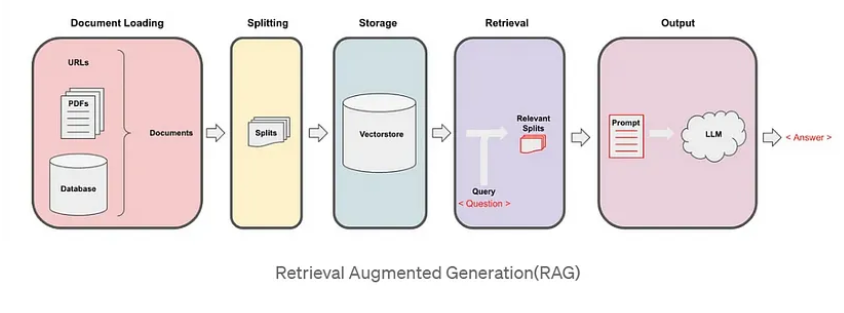

## When to use it:

This is the most basic flow but would be very effective in documents like Pdfs where there is linearity in data and no major interdependency among different parts of documents.

## Issue:

Similarity Search will filter out only top-k similar chunk which is similar to the user query but...

1. It might not be relevant chunk.

2. It will give top-k chunk only based on the words present in the query without having knowledge of its dependency on other chunks. This will result in Information loss.

In [1]:
!pip -q install langchain openai tiktoken PyPDF2 faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 16.5 MB/s eta 0:00:00


In [15]:
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [2]:
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.1 MB/s eta 0:00:00


In [13]:
!pip install langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53

In [3]:
####if you want to use gemini feel free to use this code.

'''
%pip install --upgrade --quiet  google-generativeai langchain-google-genai

import os
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

from langchain_google_genai import GoogleGenerativeAIEmbeddings
gemini_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

result = llm.invoke("Write a ballad about LangChain")
print(result.content)
'''

'\n%pip install --upgrade --quiet  google-generativeai langchain-google-genai\n\nimport os\nfrom google.colab import userdata\n\nGOOGLE_API_KEY = userdata.get(\'GOOGLE_API_KEY\')\nos.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY\n\nfrom langchain_google_genai import GoogleGenerativeAIEmbeddings\ngemini_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")\n\nfrom langchain_google_genai import ChatGoogleGenerativeAI\nllm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")\n\nresult = llm.invoke("Write a ballad about LangChain")\nprint(result.content)\n'

In [4]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

In [5]:
import os
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY

In [16]:
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [17]:
embedding = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

In [18]:
from langchain_core.documents import Document

In [19]:
docs = [
    Document(
        page_content="A bunch of scientists bring back dinosaurs and mayhem breaks loose",
        metadata={"year": 1993, "rating": 7.7, "genre": "science fiction"},
    ),
    Document(
        page_content="Leo DiCaprio gets lost in a dream within a dream within a dream within a ...",
        metadata={"year": 2010, "director": "Christopher Nolan", "rating": 8.2},
    ),
    Document(
        page_content="A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea",
        metadata={"year": 2006, "director": "Satoshi Kon", "rating": 8.6},
    ),
    Document(
        page_content="A bunch of normal-sized women are supremely wholesome and some men pine after them",
        metadata={"year": 2019, "director": "Greta Gerwig", "rating": 8.3},
    ),
    Document(
        page_content="Toys come alive and have a blast doing so",
        metadata={"year": 1995, "genre": "animated"},
    ),
    Document(
        page_content="A hacker discovers reality is a simulation and leads a rebellion against the machines controlling it.",
        metadata={"year": 1999, "director": "Lana Wachowski, Lilly Wachowski", "rating": 8.7, "genre": "science fiction"},
    ),
    Document(
        page_content="A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.",
        metadata={"year": 1994, "rating": 8.5, "genre": "animated"},
    ),
    Document(
        page_content="Batman faces off against the Joker, a criminal mastermind who plunges Gotham into chaos.",
        metadata={"year": 2008, "director": "Christopher Nolan", "rating": 9.0, "genre": "action"},
    ),
    Document(
        page_content="A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.",
        metadata={"year": 2014, "director": "Christopher Nolan", "rating": 8.6, "genre": "science fiction"},
    )
]


In [20]:
vectorstore = Chroma.from_documents(docs, embedding)

In [40]:
question1 = "Which 1994 animated movie has a rating of 8.5?"

In [41]:
question2 = "Which movie features Batman facing off against the Joker and who directed it?"

In [42]:
question3 = "What genre is the movie 'The Matrix' and who directed it?"

In [43]:
vectorstore.similarity_search(question1)

[Document(page_content='Toys come alive and have a blast doing so', metadata={'genre': 'animated', 'year': 1995}),
 Document(page_content='A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.', metadata={'genre': 'animated', 'rating': 8.5, 'year': 1994}),
 Document(page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993}),
 Document(page_content="A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.", metadata={'director': 'Christopher Nolan', 'genre': 'science fiction', 'rating': 8.6, 'year': 2014})]

In [44]:
vectorstore.similarity_search(question2)

[Document(page_content='Batman faces off against the Joker, a criminal mastermind who plunges Gotham into chaos.', metadata={'director': 'Christopher Nolan', 'genre': 'action', 'rating': 9.0, 'year': 2008}),
 Document(page_content='A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea', metadata={'director': 'Satoshi Kon', 'rating': 8.6, 'year': 2006}),
 Document(page_content='Leo DiCaprio gets lost in a dream within a dream within a dream within a ...', metadata={'director': 'Christopher Nolan', 'rating': 8.2, 'year': 2010}),
 Document(page_content='A bunch of scientists bring back dinosaurs and mayhem breaks loose', metadata={'genre': 'science fiction', 'rating': 7.7, 'year': 1993})]

In [25]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 3})

In [26]:
from langchain.chat_models import ChatOpenAI

from operator import itemgetter
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough


In [27]:
llm = ChatOpenAI(temperature=0.7)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [28]:
import textwrap
def wrap_text(text, width=90): #preserve_newlines
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

In [29]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""

In [30]:
prompt = ChatPromptTemplate.from_template(template)

In [31]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [47]:
question1

'Which 1994 animated movie has a rating of 8.5?'

In [45]:
text_reply = chain.invoke(question1)

In [46]:
print(wrap_text(text_reply))

The 1994 animated movie with a rating of 8.5 is "A young lion prince flees his kingdom
only to learn the true meaning of responsibility and bravery."


In [50]:
text_reply = chain.invoke("Tell me about the movie which have rating more than 7.")

In [48]:
text_reply = chain.invoke(question3)

In [ ]:
"Tell me about the movie which have rating more than 7."

In [51]:
print(wrap_text(text_reply))

The movie with a rating more than 7 is "A young lion prince flees his kingdom only to
learn the true meaning of responsibility and bravery."


# Self Query Retrieval

self_query_retriecal(doc): https://python.langchain.com/docs/integrations/retrievers/self_query/

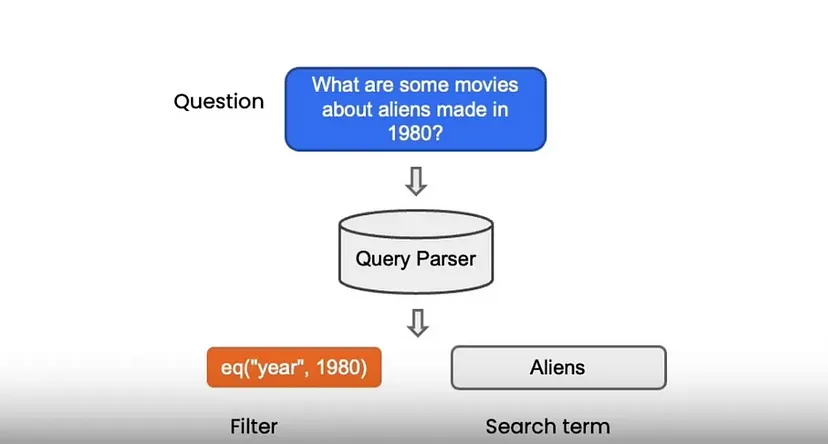

A self-query retriever is a retrieval system that can analyze a natural language question and use it to query itself. Here's how it works:

**User Input:** You provide a question in plain English.
Understanding the Question: The retriever uses a large language model (LLM) to understand the intent and meaning behind your question.

**Building a Structured Query:** The LLM then translates your question into a structured query that a search engine can understand. This structured query might include keywords and filters based on the details you provided in your question.

**Searching the Datastore:** The retriever uses the structured query to search its underlying datastore, which is typically a vector store.

**Returning Results:** The retriever retrieves the documents from the datastore that are most relevant to your question.

We use metadata-filtering to filter out the important chunks.

When it can be used: It will be effective where you have to search in a small subset of the large document. Suppose you want to know about a particular department type like “Sales” in the whole document. Then you need to add this metadata info of department type in each chunk. And filter accordingly.

#### Overall, self-query retrieval is a powerful technique that leverages the capabilities of LLMs to achieve a more sophisticated and user-centric approach to information retrieval within LangChain models.

In [15]:
!pip install langchain

In [14]:
%pip install --upgrade --quiet langchain-chroma

In [16]:
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00


In [17]:
!pip install langchain_chroma

### Architecture
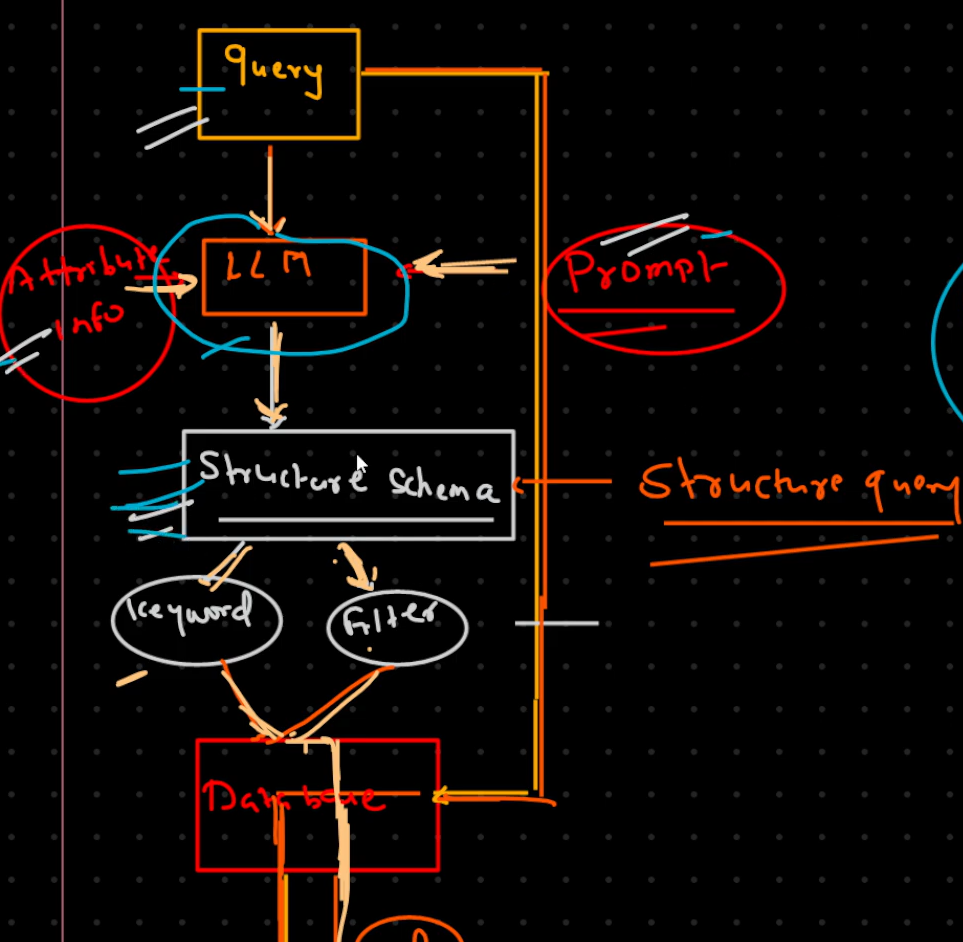

In [18]:
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [19]:
docs = [
    Document(
        page_content="A bunch of scientists bring back dinosaurs and mayhem breaks loose",
        metadata={"year": 1993, "rating": 7.7, "genre": "science fiction"},
    ),
    Document(
        page_content="Leo DiCaprio gets lost in a dream within a dream within a dream within a ...",
        metadata={"year": 2010, "director": "Christopher Nolan", "rating": 8.2},
    ),
    Document(
        page_content="A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea",
        metadata={"year": 2006, "director": "Satoshi Kon", "rating": 8.6},
    ),
    Document(
        page_content="A bunch of normal-sized women are supremely wholesome and some men pine after them",
        metadata={"year": 2019, "director": "Greta Gerwig", "rating": 8.3},
    ),
    Document(
        page_content="Toys come alive and have a blast doing so",
        metadata={"year": 1995, "genre": "animated"},
    ),
    Document(
        page_content="A hacker discovers reality is a simulation and leads a rebellion against the machines controlling it.",
        metadata={"year": 1999, "director": "Lana Wachowski, Lilly Wachowski", "rating": 8.7, "genre": "science fiction"},
    ),
    Document(
        page_content="A young lion prince flees his kingdom only to learn the true meaning of responsibility and bravery.",
        metadata={"year": 1994, "rating": 8.5, "genre": "animated"},
    ),
    Document(
        page_content="Batman faces off against the Joker, a criminal mastermind who plunges Gotham into chaos.",
        metadata={"year": 2008, "director": "Christopher Nolan", "rating": 9.0, "genre": "action"},
    ),
    Document(
        page_content="A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.",
        metadata={"year": 2014, "director": "Christopher Nolan", "rating": 8.6, "genre": "science fiction"},
    )
]


In [7]:
vectorstore = Chroma.from_documents(docs, embedding())

In [8]:
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain_openai import ChatOpenAI

In [9]:
metadata_field_info = [
    AttributeInfo(
        name="genre",
        description="The genre of the movie. One of ['science fiction', 'comedy', 'drama', 'thriller', 'romance', 'action', 'animated']",
        type="string",
    ),
    AttributeInfo(
        name="year",
        description="The year the movie was released",
        type="integer",
    ),
    AttributeInfo(
        name="director",
        description="The name of the movie director",
        type="string",
    ),
    AttributeInfo(
        name="rating", description="A 1-10 rating for the movie", type="float"
    ),
]

In [10]:
document_content_description = "Brief summary of a movie"

**User Input**: "Find red shoes under $100."
### get_query_constructor_prompt
prompt template for guiding LLMs to generate structured queries: "**Filter products where color='red' and price<$100.**"

### StructuredQueryOutputParser
LLM output into structured queries:
**{
  "filter": {
    "color": "red",
    "price": {"$lt": 100}
  }
}**


In [12]:
from langchain.chains.query_constructor.base import (
    StructuredQueryOutputParser, # parse outputs into a structured query format
    get_query_constructor_prompt, # generates a prompt template for constructing structured queries
)

In [13]:
prompt = get_query_constructor_prompt( # Creates a prompt template for guiding LLMs to generate structured queries using metadata_field_info & document_content_description
    document_content_description,
    metadata_field_info,
)

In [14]:
prompt

FewShotPromptTemplate(input_variables=['query'], examples=[{'i': 1, 'data_source': '```json\n{{\n    "content": "Lyrics of a song",\n    "attributes": {{\n        "artist": {{\n            "type": "string",\n            "description": "Name of the song artist"\n        }},\n        "length": {{\n            "type": "integer",\n            "description": "Length of the song in seconds"\n        }},\n        "genre": {{\n            "type": "string",\n            "description": "The song genre, one of "pop", "rock" or "rap""\n        }}\n    }}\n}}\n```', 'user_query': 'What are songs by Taylor Swift or Katy Perry about teenage romance under 3 minutes long in the dance pop genre', 'structured_request': '```json\n{{\n    "query": "teenager love",\n    "filter": "and(or(eq(\\"artist\\", \\"Taylor Swift\\"), eq(\\"artist\\", \\"Katy Perry\\")), lt(\\"length\\", 180), eq(\\"genre\\", \\"pop\\"))"\n}}\n```'}, {'i': 2, 'data_source': '```json\n{{\n    "content": "Lyrics of a song",\n    "attri

In [15]:
!pip install lark # Lark is required for the StructuredQueryOutputParser to parse and validate the final structured output generated by the LLM

In [16]:
output_parser = StructuredQueryOutputParser.from_components() # Parses LLM output into structured queries.

In [19]:
query_constructor = prompt | llm | output_parser

In [20]:
print(prompt.format(query="dummy question"))

Your goal is to structure the user's query to match the request schema provided below.

<< Structured Request Schema >>
When responding use a markdown code snippet with a JSON object formatted in the following schema:

```json
{
    "query": string \ text string to compare to document contents
    "filter": string \ logical condition statement for filtering documents
}
```

The query string should contain only text that is expected to match the contents of documents. Any conditions in the filter should not be mentioned in the query as well.

A logical condition statement is composed of one or more comparison and logical operation statements.

A comparison statement takes the form: `comp(attr, val)`:
- `comp` (eq | ne | gt | gte | lt | lte | contain | like | in | nin): comparator
- `attr` (string):  name of attribute to apply the comparison to
- `val` (string): is the comparison value

A logical operation statement takes the form `op(statement1, statement2, ...)`:
- `op` (and | or | not

In [21]:
query_constructor.invoke(
    {
        "query": "What are some sci-fi movies from the 90's directed by Luc Besson about taxi drivers"
    }
)

StructuredQuery(query='taxi driver', filter=Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='genre', value='science fiction'), Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.GTE: 'gte'>, attribute='year', value=1990), Comparison(comparator=<Comparator.LT: 'lt'>, attribute='year', value=2000)]), Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='director', value='Luc Besson')]), limit=None)

In [23]:
#StructuredQuery(query='taxi driver', filter=Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='genre', value='science fiction'), Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.GTE: 'gte'>, attribute='year', value=1990), Comparison(comparator=<Comparator.LT: 'lt'>, attribute='year', value=2000)]), Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='director', value='Luc Besson')]), limit=None)

SyntaxError: invalid syntax (<ipython-input-23-0f04174b694a>, line 1)

In [27]:
from langchain.retrievers.self_query.chroma import ChromaTranslator

retriever = SelfQueryRetriever(
    query_constructor=query_constructor, # query_constructor works to take the user's input query and transform it into a structured query.
    vectorstore=vectorstore,
    structured_query_translator=ChromaTranslator(), # It translates logical conditions(e.g., eq, lt, gt, etc.) in the structured query into syntax that Chroma understands.
)

In [25]:
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.7 MB/s eta 0:00:00


In [28]:
retriever.invoke(
    "What's a movie after 1990 but before 2005 that's all about toys, and preferably is animated"
)

[Document(page_content='Toys come alive and have a blast doing so', metadata={'genre': 'animated', 'year': 1995})]

In [29]:
from operator import itemgetter
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough

In [30]:

template = """Answer the question based only on the following context:
{context}

Question: {question}
"""


In [32]:

chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [35]:
text_reply = chain.invoke("Tell me about the movie which have rating more than 7.")

print(wrap_text(text_reply))

The movies with a rating of more than 7 are "A bunch of scientists bring back dinosaurs
and mayhem breaks loose" with a rating of 7.7, "Three men walk into the Zone, three men
walk out of the Zone" with a rating of 9.9, "A bunch of normal-sized women are supremely
wholesome and some men pine after them" with a rating of 8.3, and "Leo DiCaprio gets lost
in a dream within a dream within a dream within a ..." with a rating of 8.2.
